# EDA

```
data
├── directors.tsv
├── genres.tsv
├── titles.tsv
├── train_ratings.csv (전체 훈련 데이터)
├── writers.tsv
└── years.tsv
```
train_ratings 제외 나머지 데이터는 side-information

- csv (comma-separated values) 콤마로 구분된 텍스트 파일 포맷
- tsv (tab-separated values) tab으로 구분된 파일 포맷

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print('-'*5, 'Library Version', '-'*5)
print(f'python version : {sys.version}')
print(f'numpy version : {np.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'matplotlib version : {matplotlib.__version__}')
print(f'seaborn version : {sns.__version__}')

----- Library Version -----
python version : 3.9.18 (main, Feb  2 2024, 16:44:29) 
[GCC 7.5.0]
numpy version : 1.22.2
pandas version : 1.4.1
matplotlib version : 3.8.2
seaborn version : 0.13.1


## train_ratings

- 구성:
    - user: 사용자 id
    - item: 영화 id (side information 에서도 동일하게 사용된다.)
    - time: 사용자가 해당 영화와 interact한 시간.

- 사용자의 영화 시청 이력 파악
- 포인트:
    - 각 사용자별 시청한 영화 수 분석
    - 시청 빈도가 높은 상위 영화 탐색
    - interact한 시간 분석하기
    - 사용자별 시청 영화의 다양성 분석

In [2]:
# Data Load

data_path = '../input/data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
print(train_df.shape)

(5154471, 3)


In [3]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [4]:
# Get numbers of user and item

num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print("% of train users: ", num_train_users)
print("% of train items: ", num_train_items)

% of train users:  31360
% of train items:  6807


In [5]:
# Get sparsity

print("Sparsity ratio: ", 1 - (len(train_df) / (num_train_users * num_train_items)))

Sparsity ratio:  0.9758536052697853


Sparsity ratio 는 약 97.59% 입니다.

### 사용자 별 시청한 영화 수 분석

In [6]:
user_item_count = train_df.groupby('user')['item'].count()

user_item_count.describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: item, dtype: float64

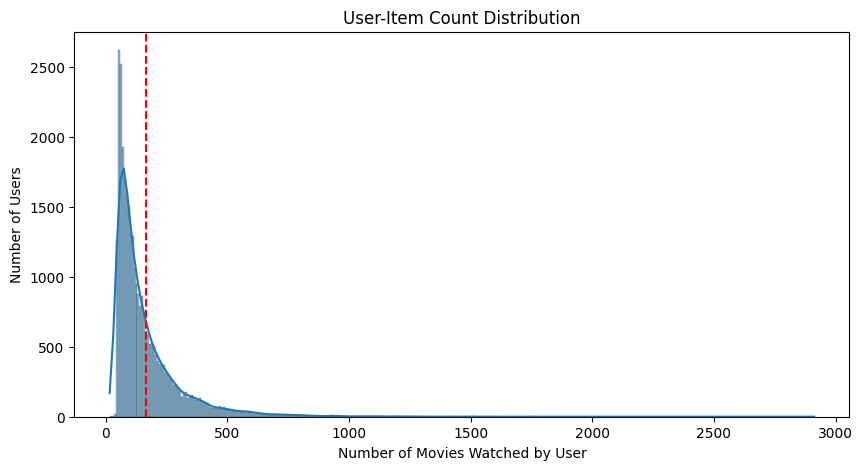

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.histplot(user_item_count, kde=True, ax=ax)
ax.set_title('User-Item Count Distribution')
ax.set_xlabel('Number of Movies Watched by User')
ax.set_ylabel('Number of Users')
ax.axvline(user_item_count.mean(), color='r', linestyle='--', label='Mean')

plt.show()


### 시청 빈도가 높은 상위 영화 탐색

In [8]:
item_user_count = train_df.groupby('item')['user'].count()

item_user_count.describe()

count     6807.000000
mean       757.230939
std       1682.973090
min         27.000000
25%         90.000000
50%        197.000000
75%        610.500000
max      19699.000000
Name: user, dtype: float64

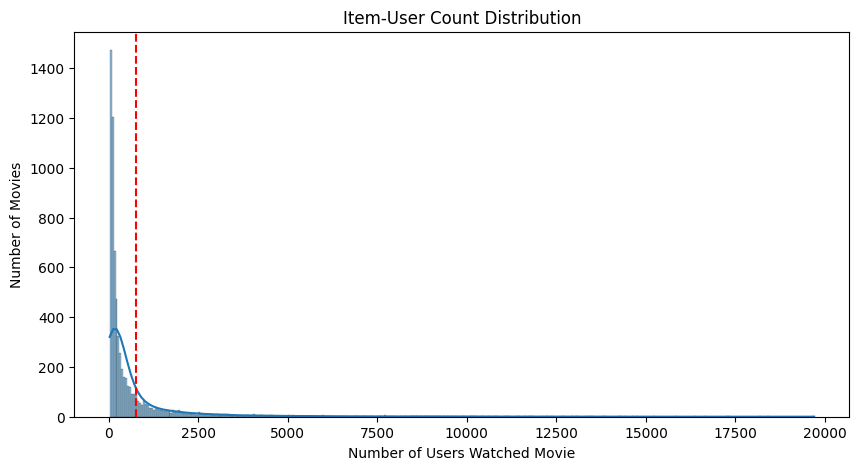

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.histplot(item_user_count, kde=True, ax=ax)
ax.set_title('Item-User Count Distribution')
ax.set_xlabel('Number of Users Watched Movie')
ax.set_ylabel('Number of Movies')
ax.axvline(item_user_count.mean(), color='r', linestyle='--', label='Mean')

plt.show()

In [10]:
# Popular movies (over 10000 ratings)

popular_movies = train_df['item'].value_counts()
popular_movies = popular_movies[popular_movies > 10000]

popular_movies

2571     19699
2959     18437
296      18202
318      18168
356      17339
4993     17237
7153     16656
5952     16387
593      15847
2858     15213
4226     14726
260      14613
1196     14401
2762     14291
1198     14224
47       13857
50       13789
1270     13541
4306     13495
33794    13405
858      13338
7361     13292
3578     13114
58559    13060
1210     12931
527      12723
6539     12672
110      12359
2028     12250
6874     12229
1        12217
6377     12105
1136     12084
8961     11857
4973     11846
589      11796
2329     11746
480      11604
32       11477
4963     11374
1291     11156
1089     11108
5418     11079
1704     10864
7438     10843
4886     10826
4995     10820
32587    10774
48516    10603
1193     10603
4878     10484
608      10396
44191    10272
1240     10197
1682     10179
1265     10154
1214     10107
Name: item, dtype: int64

In [11]:
# Popular users (over 1000 ratings)

popular_users = train_df['user'].value_counts()
popular_users = popular_users[popular_users > 1000]

popular_users

8405     2912
54465    1980
24219    1842
32514    1830
91349    1795
         ... 
46396    1020
80207    1019
15585    1017
50045    1012
28860    1005
Name: user, Length: 110, dtype: int64

## Side Information 활용하기

years.tsv
- item
- year

...

In [12]:
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

### genre_data

In [13]:
genre_data

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


In [14]:
# 영화별 장르

genre_per_item = genre_data.groupby('item')
genre_per_item = genre_per_item['genre'].apply(lambda x: x.tolist())
genre_per_item = genre_per_item.to_frame().reset_index()
genre_per_item

,item,genre
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,"[Adventure, Children, Fantasy]"
2,3,"[Comedy, Romance]"
3,4,"[Comedy, Drama, Romance]"
4,5,[Comedy]
...,...,...
6802,118700,[Drama]
6803,118900,[Drama]
6804,118997,"[Children, Comedy, Fantasy, Musical]"
6805,119141,"[Action, Comedy]"


In [15]:
# 영화별 장르 수

genre_count = genre_per_item['genre'].apply(lambda x: len(x))
genre_count.describe()

count    6807.000000
mean        2.340679
std         1.114049
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: genre, dtype: float64

In [16]:
train_df.groupby('user')['item']

In [17]:
# 유저별 shannon 다양성 지수

user_genres = {}
for user, group in train_df.groupby('user'):
    user_genres[user] = group['item'].map(genre_per_item.set_index('item')['genre']).sum()

user_genres = pd.Series(user_genres)

In [18]:
user_genres

11        [Action, Adventure, Drama, Sci-Fi, Action, Adv...
14        [Action, Adventure, Animation, Children, Comed...
18        [Drama, Drama, Western, Comedy, Comedy, Drama,...
25        [Drama, Crime, Drama, Horror, Mystery, Thrille...
31        [Action, Adventure, Sci-Fi, Action, Adventure,...
                                ...                        
138473    [Drama, Sci-Fi, Animation, Children, Fantasy, ...
138475    [Comedy, Drama, Romance, Drama, Animation, Chi...
138486    [Comedy, Horror, Thriller, Action, Comedy, Fan...
138492    [Action, Adventure, Fantasy, Action, Adventure...
138493    [Comedy, Drama, Adventure, Fantasy, Drama, Mys...
Length: 31360, dtype: object

In [19]:
user_genre_df = train_df.merge(genre_per_item, on='item')
user_genre = user_genre_df.groupby('user')['genre'].apply(lambda x: x.tolist())
user_genre = user_genre.to_frame().reset_index()
user_genre

,user,genre
0,11,"[[Action, Adventure, Drama, Sci-Fi], [Action, ..."
1,14,"[[Adventure, Animation, Children, Comedy, Fant..."
2,18,"[[Comedy, Drama], [Drama, Romance, Sci-Fi], [C..."
3,25,"[[Mystery, Sci-Fi, Thriller], [Comedy], [Comed..."
4,31,"[[Action, Fantasy, War], [Adventure, Animation..."
...,...,...
31355,138473,"[[Mystery, Sci-Fi, Thriller], [Action, Fantasy..."
31356,138475,"[[Drama, Romance, Sci-Fi], [Drama, Sci-Fi, Thr..."
31357,138486,"[[Drama, Horror, Thriller], [Action, Horror, S..."
31358,138492,"[[Comedy, Drama], [Drama, Romance, Sci-Fi], [A..."


In [20]:
def shannon_entropy(x):
    counts = pd.Series(x).value_counts()
    probs = counts / np.sum(counts)
    return -np.sum(probs * np.log(probs)) #for p in probs if p > 0])

shannon_diversity = user_genre['genre'].apply(shannon_entropy)
shannon_diversity

0        4.713665
1        4.021019
2        3.190542
3        3.758224
4        4.129822
           ...   
31355    3.800748
31356    3.707164
31357    4.251053
31358    3.294868
31359    4.733440
Name: genre, Length: 31360, dtype: float64

In [21]:
shannon_diversity.describe()

count    31360.000000
mean         3.922227
std          0.435374
min          1.685283
25%          3.609349
50%          3.916619
75%          4.232960
max          5.336697
Name: genre, dtype: float64

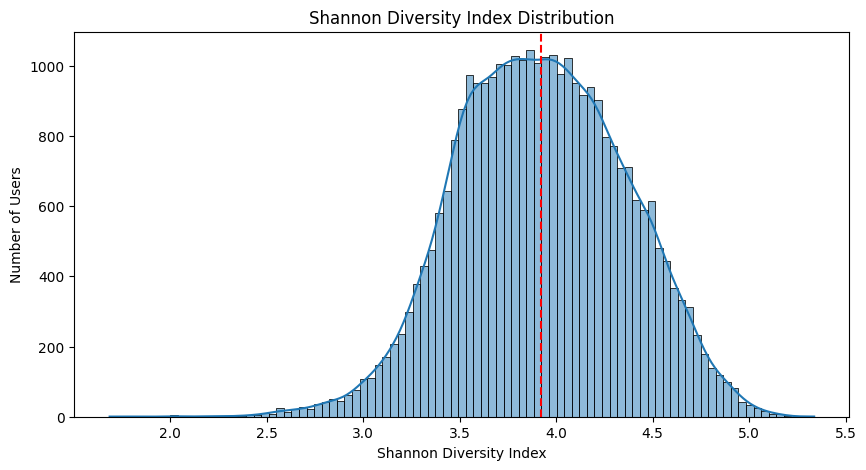

In [22]:
# shannon to seaborn plot

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.histplot(shannon_diversity, kde=True, ax=ax)
ax.set_title('Shannon Diversity Index Distribution')
ax.set_xlabel('Shannon Diversity Index')
ax.set_ylabel('Number of Users')
ax.axvline(shannon_diversity.mean(), color='r', linestyle='--', label='Mean')

plt.show()

### Time
- unix 시간을 변환한 뒤 마지막 시청 일 이후 개봉한 영화에 대해서 제출전 필터링 가능할 듯


### Popular sources

많은 사람들이 본 영화, 영화를 자주 본 사람들에 대한 시각화

/tmp/ipykernel_167578/821362070.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


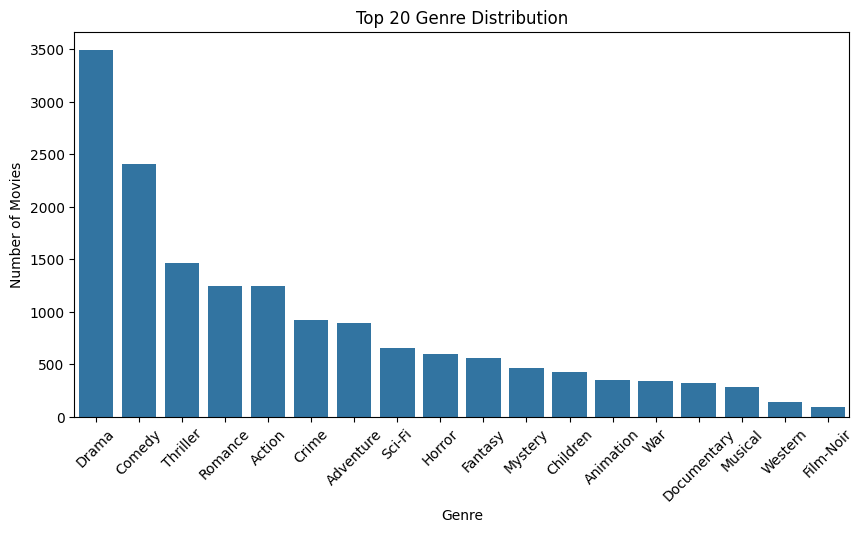

In [23]:
# 영화 개별 장르 분포 top 20

genre_count_top20 = genre_data['genre'].value_counts()[:20]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(x=genre_count_top20.index, y=genre_count_top20.values, ax=ax)
ax.set_title('Top 20 Genre Distribution')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [24]:
genre_per_item['genre'].value_counts()[:20]

[Drama]                             832
[Comedy]                            464
[Comedy, Drama]                     308
[Drama, Romance]                    297
[Comedy, Romance]                   246
[Documentary]                       229
[Comedy, Drama, Romance]            228
[Drama, Thriller]                   132
[Crime, Drama]                      107
[Drama, War]                        100
[Crime, Drama, Thriller]            100
[Horror]                             82
[Horror, Thriller]                   82
[Comedy, Crime]                      67
[Action, Adventure, Sci-Fi]          60
[Action, Comedy]                     53
[Action, Crime, Drama, Thriller]     52
[Action, Crime, Thriller]            52
[Thriller]                           46
[Children, Comedy]                   46
Name: genre, dtype: int64

In [25]:
genres = [', '.join(x) for x in genre_per_item['genre'].value_counts().index[:20]]
genres

['Drama',
 'Comedy',
 'Comedy, Drama',
 'Drama, Romance',
 'Comedy, Romance',
 'Documentary',
 'Comedy, Drama, Romance',
 'Drama, Thriller',
 'Crime, Drama',
 'Drama, War',
 'Crime, Drama, Thriller',
 'Horror',
 'Horror, Thriller',
 'Comedy, Crime',
 'Action, Adventure, Sci-Fi',
 'Action, Comedy',
 'Action, Crime, Drama, Thriller',
 'Action, Crime, Thriller',
 'Thriller',
 'Children, Comedy']

<Axes: >

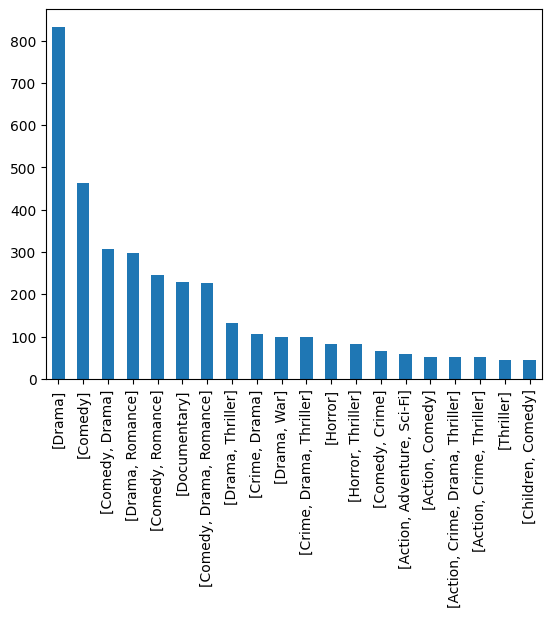

In [26]:
genre_per_item['genre'].value_counts()[:20].plot(kind='bar')

/tmp/ipykernel_167578/2942862376.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


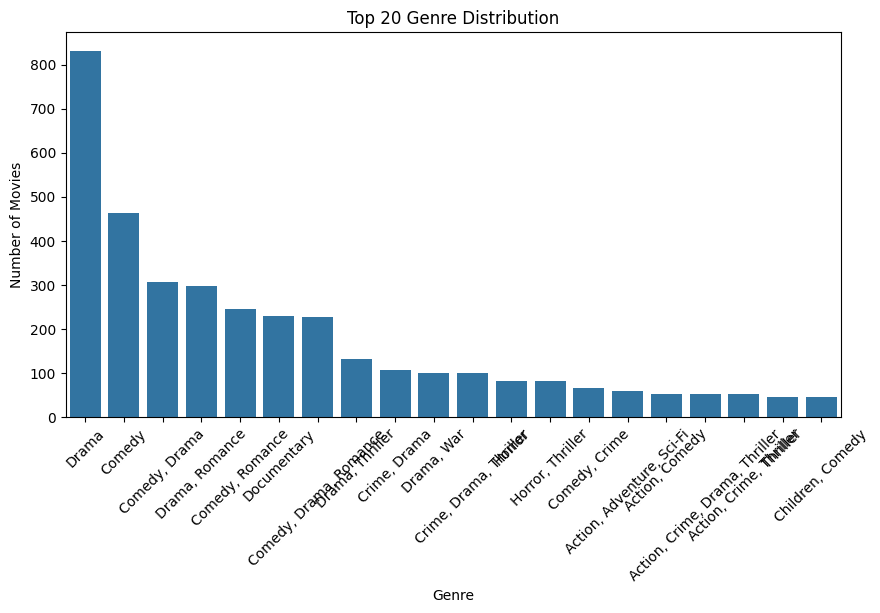

In [27]:
# 영화 전체의 장르 list일 때

genre_per_item_top20 = genre_per_item['genre'].value_counts()[:20]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(x=genres, y=genre_per_item_top20.values, ax=ax)
ax.set_title('Top 20 Genre Distribution')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()
